In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

df=pd.read_excel("C:\\Users\\Priyanka Singh\\Downloads\\_(Responses) (1).xlsx")
df100=df
# df.head(2)
df=df.dropna(axis=1,how='all')
# df.head(2)
# to  CONVERT all option in questionnaire and ASSIGN numerical weights to them
df=df.replace(['I have no knowledge',
               'I have basic knowledge and little experience with investment',
               'I have fair amount of knowledge and investment experience',
               'I have considerable knowledge and comfortable with most investment avenues',
               'I have extensive knowledge and experience of investing in different asset classes',
               'To protect capital',
               'To protect capital and earn regular income',
               'To grow capital',
               'To grow capital and generate regular income',
               'To build long term wealth',
               'Mainly money market,short term funds,corporate/bank deposits and bonds',
               'Mainly debt market instruments/gold and some portion in blue chip stocks',
               'A mix of debt instruments,blue chip/aggressive stocks ad capital protected instruments',
               'Mainly aggressive stock,high yield debt funds(small and midcap stock and income funds) private equity and real estate',
               'Mostly speculative or high risk investments(Aggressive stocks,high risk funds,options,real estate leveraged positions etc)',
               'More than 50%',
               '25%-5O%',
               '10%-25 %',
               'Below 10%',
               'None of my investments',
               'Within 1 year',
               'Between 1 and 3 years',
               'Between 3 and 5 year',
               'Between 5 and 7 yrs',
               'Between 7 and 10 years',
               'Less than 3 months',
               'Up to 6 months',
               'Up to 12 months',
               'Up to 2 years',
               'Up to 3 years or more',
               'I feel comfortable with investments that involve lower risk and generate lower but consistent returns year-to-year',
               'I am willing to withstand minor fluctuations in my portfolio but prefer to be invested in less risky investments',
               'I seek moderate capital growth over longterm period with short term fluctuations,but averse to take hgh risks',
               'I seek substantial investments returns,willing to accept occassional short term declines',
               'I seek potentially high investment returns,willing to accept occasional the high risks including loss of capital',
               'Inflation rate plus 1-3% p.a',
               'Inflation rate plus 3-5% p.a',
               'Inflation rate plus 5-7% p.a',
               'Inflation rate plus 7-10% p.a',
               'More than 10% p.a',
               'Not trade in stocks',
               'Sell all your holdings in that stock',
               'Sell part of your holdings in that stock',
               'Hold in order to get better returns',
               'Buy more of that stock',
               'Less than 5%',
               '5% to 15%',
               '15% to 25%',
               '25% to 35%',
               'Over 35%', 
              ],
              [2,4,6,8,10,
               2,4,6,8,10,
               2,4,6,8,10,
               2,4,6,8,10,
               2,4,6,8,10,
               2,4,6,8,10,
               2,4,6,8,10,
               2,4,6,8,10,
               2,4,6,8,10,
               2,4,6,8,10, 
              ])
# df1=df
# df1=df1.count()
# df1
# created a new column-total
df['Total']=0
# to add all row values and display sum in total column
# using new data frame-df1
df1=df
df1.set_index('Id',inplace=True)
df1['Total']=df1.sum(axis=1)
df1.head(3)
# to write back to excel
# path= "C:\\Users\\Priyanka Singh\\Downloads\\new_Responses.xlsx"
# writer=pd.ExcelWriter(path, engine='xlsxwriter')
# df1.to_excel(writer, sheet_name='Sheet1',index='false')
# writer.save()

# to CATEGORIZE the investor into different predefined category
def f(row):
    if row['Total']>=32 and row['Total']<=55:
        val='wealth guard'
    if row['Total']>=56 and row['Total']<=70:
        val='wealth keeper'
    if row['Total']>=71 and row['Total']<=85:
        val='wealth builder'
    if row['Total']>=86 and row['Total']<=100:
        val='wealth enhancer'
    if row['Total']>=101:
        val='wealth multiplier'
    return val

df1['category']=df1.apply(f,axis=1)
df1.head()
# df100.head()

#  df.shape()[ERROR]
# path= "C:\\Users\\Priyanka Singh\\Downloads\\new_Responsesdf1.xlsx"
# writer=pd.ExcelWriter(path, engine='xlsxwriter')
# df1.to_excel(writer, sheet_name='Sheet1',index='false')
# writer.save()



,Name,Annual Income,Occupation,How familiar are you with financial markets,Which of the following best describes your purpose of investing?,Your current investment portfolio comprises of,Age,To met foreseen and unforeseen circumstances you may keep-----------------of your investments in liquid instruments,When do you plan to stat withdrawing money from your Investments for major needs? (other than provisions made as mentioned in Question above),"If your Investment turns bad due to global economic melt-down, for how long would you be prepared to see your investment performing poorly before getting worried and/or liquidating it",...,Your familiarity with investment products/markets as mentioned below(Please mark tick) [Fixed income mutual unds],Your familiarity with investment products/markets as mentioned below(Please mark tick) [Direct equity],Your familiarity with investment products/markets as mentioned below(Please mark tick) [Equity PMS],Your familiarity with investment products/markets as mentioned below(Please mark tick) [Equity Mutual funds],Your familiarity with investment products/markets as mentioned below(Please mark tick) [Structured Products],Your familiarity with investment products/markets as mentioned below(Please mark tick) [AIFS],Your familiarity with investment products/markets as mentioned below(Please mark tick) [Private Equity(Including real estates)],Your familiarity with investment products/markets as mentioned below(Please mark tick) [Equity derivatives],Total,category
Id,,,,,,,,,,,,,,,,,,,,,
100,Dr Strange,5-10 Lakhs,Salaries,6,8,8,21-25,8,8,10,...,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,105.0,wealth multiplier
101,Mr rawat,1-5 Crores,Business,8,10,8,36-40,8,8,8,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,110.0,wealth multiplier
102,Mr rathi,1-5 Crores,Business,10,8,10,36-40,8,10,10,...,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,108.0,wealth multiplier
103,mr jain,25-1 Crore,Salaries,8,10,8,Above 40,8,10,8,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,95.0,wealth enhancer
104,mr shah,1-5 Crores,Salaries,6,8,8,36-40,8,10,8,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,91.0,wealth enhancer


In [3]:
# created new data frame and COPIED some columns from 1st data frame
df2=df1.filter(['Name','Age','Occupation', 'Annual Income','category'],axis=1)
# created new columns in 2nd data frame
# df2['large cap','small cap','mid cap','fixed income','cash investment']=[0,0,0,0,0][error]
df2['large cap(%)']=0
df2['small cap(%)']=0
df2['mid cap(%)']=0
df2['fixed income(%)']=0
df2['cash investment(%)']=0
df2.head()

def large(x):
    if x['category']=='wealth guard':
        valu =np.random.randint(13,17)
    if x['category']=='wealth keeper':
        valu =np.random.randint(23,27)
    if x['category']=='wealth builder':
        valu=np.random.randint(33,37)
    if x['category']=='wealth enhancer':
        valu=np.random.randint(43,47)
    if x['category']=='wealth multiplier':
        valu=np.random.randint(53,57)
    return valu

def small(x):
    if x['category']=='wealth guard':
        valu =np.random.randint(3,7)
    if x['category']=='wealth keeper':
        valu =np.random.randint(3,7)
    if x['category']=='wealth builder':
        valu=np.random.randint(8,12)
    if x['category']=='wealth enhancer':
        valu=np.random.randint(13,17)
    if x['category']=='wealth multiplier':
        valu=np.random.randint(18,22)
    return valu

def mid(x):
    if x['category']=='wealth guard':
        valu =0
    if x['category']=='wealth keeper':
        valu =np.random.randint(8,12)
    if x['category']=='wealth builder':
        valu=np.random.randint(13,17)
    if x['category']=='wealth enhancer':
        valu=np.random.randint(18,22)
    if x['category']=='wealth multiplier':
        valu=np.random.randint(23,27)
    return valu
def fixed(x):
    if x['category']=='wealth guard':
        valu =np.random.randint(48,52)
    if x['category']=='wealth keeper':
        valu =np.random.randint(48,52)
    if x['category']=='wealth builder':
        valu=np.random.randint(33,37)
    if x['category']=='wealth enhancer':
        valu=np.random.randint(13,17)
    if x['category']=='wealth multiplier':
        valu=0
    return valu
def cash(x):
    if x['category']=='wealth guard':
        valu =np.random.randint(28,32)
    if x['category']=='wealth keeper':
        valu =np.random.randint(8,12)
    if x['category']=='wealth builder':
        valu=np.random.randint(3,7)
    if x['category']=='wealth enhancer':
        valu=np.random.randint(3,7)
    if x['category']=='wealth multiplier':
        valu=np.random.randint(3,7)
    return valu

df2['large cap(%)']=df2.apply(large,axis=1)
df2['small cap(%)']=df2.apply(small,axis=1)
df2['mid cap(%)']=df2.apply(mid,axis=1)
df2['fixed income(%)']=df2.apply(fixed,axis=1)
df2['cash investment(%)']=df2.apply(cash,axis=1)
df2.head()
df4=df2
df4.head()


# &(df1['Name']==x['Name'])
# def fu(x):
#     global df1
#     if df1['category']=='wealth guard':
#         cap=np.random.randint(13,17)
#     if df1['category']=='wealth keeper':
#         cap=np.random.randint(23,27)
#     if df1['category']=='wealth builder':
#         cap=np.random.randint(33,37)
#     if df1['category']=='wealth enhancer':
#         cap=np.random.randint(43,47)
#     if df1['category']=='wealth multiplier':
#         cap=np.random.randint(53,57)
    
# #     cap=df1.apply(lambda y:y['category'] if (y['category']=='wealth guard' or y['category']=='wealth keeper'
# #                   or y['category']== 'wealth builder' or y['category']=='wealth enhancer'
# #                   or  y['category']=='wealth multiplier') and x['Name']==y['Name'] else None,axis=1 )
# #     cap=cap.dropna(axis=0,how='all')
#     if cap.empty:
#         cap= np.nan
#     else: 
#         cap= cap.to_string(index=False)
        
#     return cap


# df2['large cap']=df2.apply(fu,axis=1)




# in the sheet new response u need to create id, remove column which are blank as of know i have removed it manually
# df3=pd.read_excel('C:\\Users\\Priyanka Singh\\Downloads\\Book1.xlsx')
# df3.head(4)




    
    
    



,Name,Age,Occupation,Annual Income,category,large cap(%),small cap(%),mid cap(%),fixed income(%),cash investment(%)
Id,,,,,,,,,,
100,Dr Strange,21-25,Salaries,5-10 Lakhs,wealth multiplier,55,19,26,0,4
101,Mr rawat,36-40,Business,1-5 Crores,wealth multiplier,54,19,26,0,3
102,Mr rathi,36-40,Business,1-5 Crores,wealth multiplier,54,21,25,0,6
103,mr jain,Above 40,Salaries,25-1 Crore,wealth enhancer,46,15,21,14,3
104,mr shah,36-40,Salaries,1-5 Crores,wealth enhancer,44,16,19,13,3


In [4]:
df5=df1.merge(df4,how='outer',on='Id',sort=False)
path= "C:\\Users\\Priyanka Singh\\Downloads\\new_Responsesdf5.xlsx"
writer=pd.ExcelWriter(path, engine='xlsxwriter')
df5.to_excel(writer, sheet_name='Sheet1',index='false')
writer.save()

In [5]:
# df3=pd.read_excel('C:\\Users\\Priyanka Singh\\Downloads\\Book1.xlsx')
# df3.set_index('Id',inplace=True)
# df3.head(4)
dfx=df5
del dfx['Name_x']
del dfx['Annual Income_x']
del dfx['Age_x']
del dfx['Occupation_x']
del dfx['category_x']

del dfx['Name_y']
del dfx['Annual Income_y']
del dfx['Age_y']
del dfx['Occupation_y']
del dfx['category_y']
dfx.head()


df3=dfx

allusers=df3.values
user38=allusers[0]
den1=np.sqrt(sum([np.square(x) for x in user38]))

cosinesimilarity=[(106,1)]
i=1
for user in allusers[1:]:
    num=[x*y for x,y in zip(user38,user)]
    den2=np.sqrt(sum([np.square(x) for x in user]))
    costheta=sum(num)/(den1*den2)
    cosinesimilarity.append((df3.index[i],costheta))
    i+=1
cosinesimilarity.sort(key=lambda x: x[1],reverse=True)

similar10users=cosinesimilarity[0:10]
similar10users




[(106, 1),
 (101, 0.998816559711969),
 (136, 0.9983443170100218),
 (102, 0.9982933784744153),
 (137, 0.9982606191139527),
 (113, 0.9978312245719932),
 (104, 0.9904013980407251),
 (112, 0.9900920077903337),
 (132, 0.9900550251252797),
 (103, 0.9900341129878175)]

In [6]:
top10df=pd.DataFrame()
top10df
for user in similar10users:
    top10df=top10df.append(df3.loc[user[0]])
top10df['costheta']=[user[1] for user in similar10users]
allvalues=top10df.values
top10df
toprecommend=top10df
# toprecommend.rename(columns = {" ":"Id"},inplace=True)
# toprecommend.columns.values[0]="Id"
toprecommend
# den=sum([x[1] for x in similar10users])
# inx=0
# values=[]
# for x in top10df.loc[137]:
#     totalsum=0
#     if x==NaN:
#         for v in range(1,10):
#             totalsum+=all_values[v-1][inx*allvalues[v-1][21]]
#         top10df.loc[137][inx+1]=totalsum/den
#     inx+=1
# top10df

# path= "C:\\Users\\Priyanka Singh\\Downloads\\new_Responsestop10df.xlsx"
# writer=pd.ExcelWriter(path, engine='xlsxwriter')
# top10df.to_excel(writer, sheet_name='Sheet1',index='false')
# writer.save()

    

,Your current investment portfolio comprises of,Assuming an inflation rate 5-7% p.a over medium to long term horizon(3 to 5+ yr) what return do you reasonably expect from your investments,How familiar are you with financial markets,How will you best describe your investment behaviour,"If your Investment turns bad due to global economic melt-down, for how long would you be prepared to see your investment performing poorly before getting worried and/or liquidating it","If your investment in particular stock falls by 25% and there is no change in the fundamentals of company(assuming that your circumstances and conviction about that stock has not changed),you will",To met foreseen and unforeseen circumstances you may keep-----------------of your investments in liquid instruments,Total,When do you plan to stat withdrawing money from your Investments for major needs? (other than provisions made as mentioned in Question above),Which of the following best describes your purpose of investing?,...,Your familiarity with investment products/markets as mentioned below(Please mark tick) [Fixed income mutual unds],Your familiarity with investment products/markets as mentioned below(Please mark tick) [Money market instrument],Your familiarity with investment products/markets as mentioned below(Please mark tick) [Private Equity(Including real estates)],Your familiarity with investment products/markets as mentioned below(Please mark tick) [Structured Products],cash investment(%),fixed income(%),large cap(%),mid cap(%),small cap(%),costheta
106,6.0,4.0,6.0,4.0,6.0,6.0,4.0,67.0,6.0,6.0,...,2.0,1.0,2.0,1.0,8.0,51.0,26.0,10.0,5.0,1.000000
101,8.0,8.0,8.0,10.0,8.0,8.0,8.0,110.0,8.0,10.0,...,3.0,2.0,3.0,2.0,3.0,0.0,54.0,26.0,19.0,0.998817
136,10.0,8.0,10.0,10.0,8.0,8.0,8.0,110.0,6.0,8.0,...,3.0,2.0,3.0,3.0,5.0,0.0,54.0,26.0,18.0,0.998344
102,10.0,8.0,10.0,8.0,10.0,8.0,8.0,108.0,10.0,8.0,...,3.0,3.0,2.0,1.0,6.0,0.0,54.0,25.0,21.0,0.998293
137,10.0,8.0,10.0,10.0,10.0,10.0,8.0,119.0,8.0,10.0,...,2.0,2.0,3.0,3.0,5.0,0.0,56.0,26.0,21.0,0.998261
113,10.0,8.0,10.0,10.0,6.0,10.0,8.0,110.0,6.0,10.0,...,2.0,3.0,3.0,2.0,5.0,0.0,56.0,24.0,18.0,0.997831
104,8.0,4.0,6.0,6.0,8.0,8.0,8.0,91.0,10.0,8.0,...,2.0,1.0,2.0,2.0,3.0,13.0,44.0,19.0,16.0,0.990401
112,6.0,6.0,8.0,8.0,6.0,8.0,6.0,88.0,4.0,8.0,...,2.0,3.0,2.0,1.0,4.0,13.0,43.0,19.0,15.0,0.990092
132,8.0,6.0,8.0,8.0,4.0,6.0,6.0,88.0,4.0,8.0,...,2.0,2.0,3.0,3.0,3.0,13.0,44.0,21.0,16.0,0.990055
103,8.0,6.0,8.0,8.0,8.0,6.0,8.0,95.0,10.0,10.0,...,2.0,2.0,1.0,1.0,3.0,14.0,46.0,21.0,15.0,0.990034


In [7]:
# toprecommend=[]
# for i,x in enumerate(top10df.loc[137].values):
#     if x > 0.0:
#         toprecommend.append((i,x))
# toprecommend.sort(key=lambda x: x[1],reverse=True)
# toprecommend[:10]
# toprecommend.concat(df4,left_on='costheta',right_on='category')
# pd.concat([toprecommend,df4],sort='True',axis=1)

large_cap=toprecommend['large cap(%)'].mean()
small_cap=toprecommend['small cap(%)'].mean()
mid_cap=toprecommend['mid cap(%)'].mean()
fixed_income=toprecommend['fixed income(%)'].mean()
cash_investment=toprecommend['cash investment(%)'].mean()


recommended_portfolio=[large_cap,small_cap,mid_cap,fixed_income,cash_investment]
recommended_portfolio

[47.7, 16.4, 21.7, 10.4, 4.5]

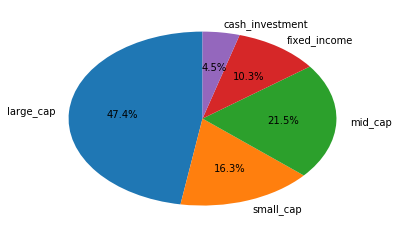

In [9]:
import matplotlib.pyplot as plt
portfolio = 'large_cap', 'small_cap','mid_cap','fixed_income','cash_investment'
sizes = [47.7,16.4,21.7,10.4,4.5]
plt.pie(sizes, labels=portfolio, startangle=90, autopct='%.1f%%')
plt.show()